In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint
from TestProblems import prey_predator_model, van_der_pol_model, CSTR_3state_model, CSTR_1state_model, PFR_1state_model, PFR_3state_model

# Test simulations for the test problems

## Prey-predator model

In [2]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = [20, 9]  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate

N = 1000

f, J = prey_predator_model(a, b)

# Solve using ode45 (method='RK45')
solution_ode45 = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))

# Solve using ode15s (method='LSODA')
solution_ode15s = solve_ivp(f, t_span, x0, method='Radau', t_eval=np.linspace(t_span[0], t_span[1], N))

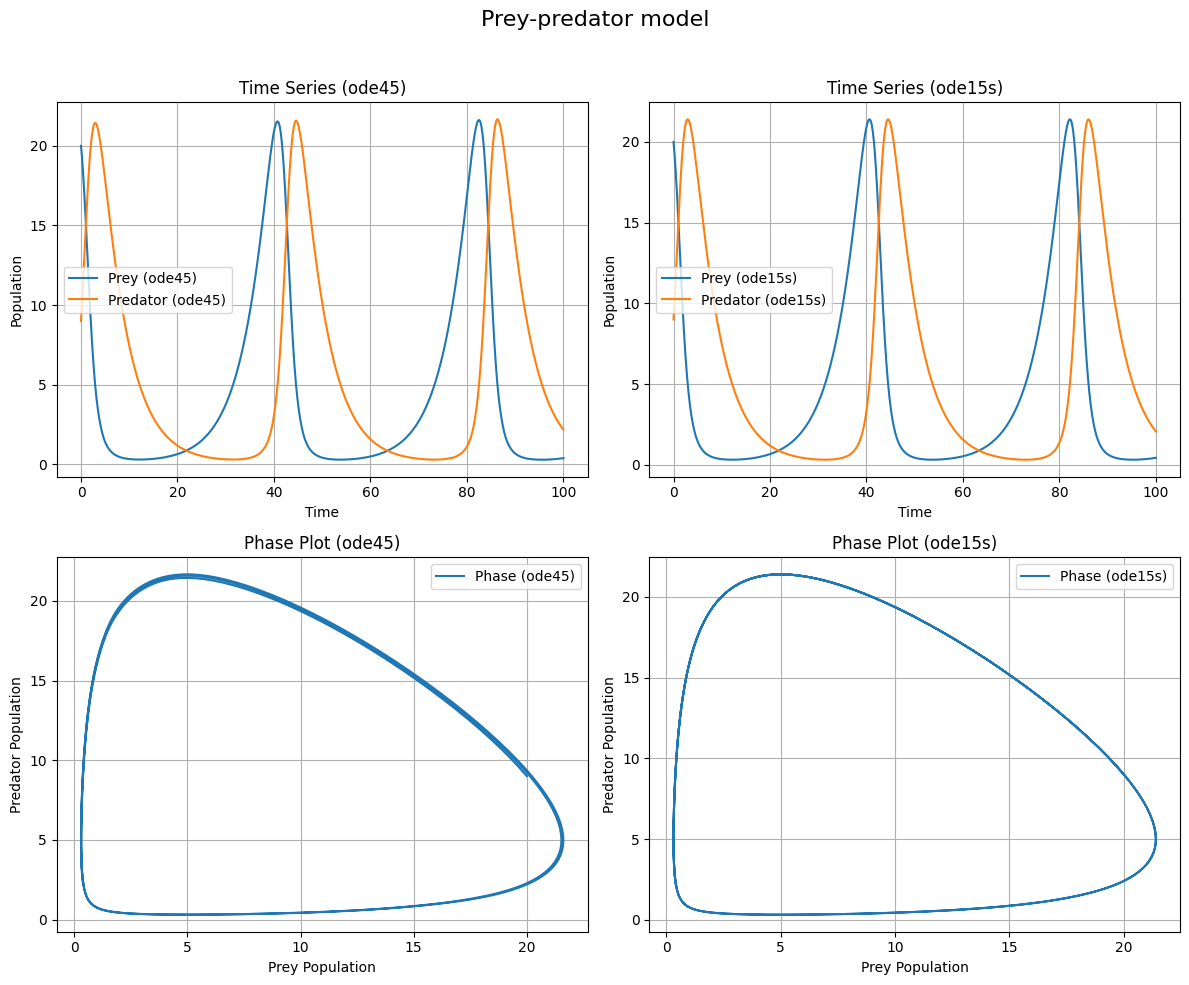

In [3]:
plt.figure(figsize=(12, 10))
plt.suptitle('Prey-predator model', fontsize=16)

# Time series for ode45
plt.subplot(2, 2, 1)
plt.plot(solution_ode45.t, solution_ode45.y[0], label='Prey (ode45)')
plt.plot(solution_ode45.t, solution_ode45.y[1], label='Predator (ode45)')
plt.title('Time Series (ode45)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)

# Time series for ode15s
plt.subplot(2, 2, 2)
plt.plot(solution_ode15s.t, solution_ode15s.y[0], label='Prey (ode15s)')
plt.plot(solution_ode15s.t, solution_ode15s.y[1], label='Predator (ode15s)')
plt.title('Time Series (ode15s)')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)

# Phase plot for ode45
plt.subplot(2, 2, 3)
plt.plot(solution_ode45.y[0], solution_ode45.y[1], label='Phase (ode45)')
plt.title('Phase Plot (ode45)')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.legend()
plt.grid(True)

# Phase plot for ode15s
plt.subplot(2, 2, 4)
plt.plot(solution_ode15s.y[0], solution_ode15s.y[1], label='Phase (ode15s)')
plt.title('Phase Plot (ode15s)')
plt.xlabel('Prey Population')
plt.ylabel('Predator Population')
plt.legend()
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Van der Pol model

In [4]:
# Define time span and initial conditions
mu_nonstiff = 1  # Non-stiff
mu_stiff = 100  # Stiff
t_span = (0, 20)
x0 = [2, 0]  # Initial condition

N = 1000

f_stiff, _ = van_der_pol_model(mu_stiff)
f_nonstiff, _ = van_der_pol_model(mu_nonstiff)

# Solve using ode45 (method='RK45')
sol_nonstiff = solve_ivp(f_nonstiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))

sol_stiff = solve_ivp(f_stiff, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))

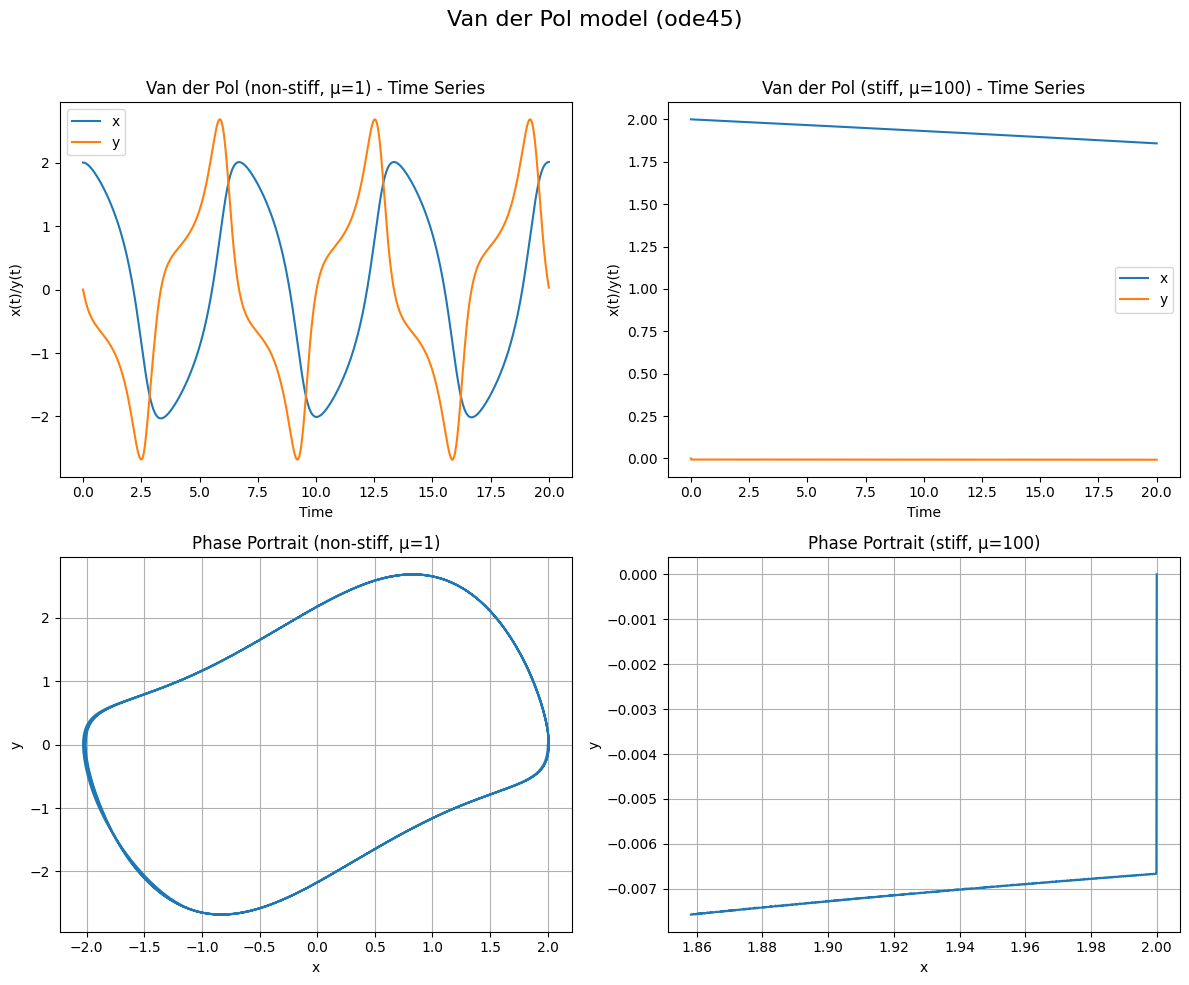

In [ ]:
# Plotting time series and phase portraits
plt.figure(figsize=(12, 10))
plt.suptitle('Van der Pol model (ode45)', fontsize=16)

# Plot time series for non-stiff
plt.subplot(2, 2, 1)
plt.plot(sol_nonstiff.t, sol_nonstiff.y[0], label='x')
plt.plot(sol_nonstiff.t, sol_nonstiff.y[1], label='y')
plt.legend()
plt.title('Van der Pol (non-stiff, μ=1) - Time Series')
plt.xlabel('Time')
plt.ylabel('x(t)/y(t)')

# Plot time series for stiff
plt.subplot(2, 2, 2)
plt.plot(sol_stiff.t, sol_stiff.y[0], label='x')
plt.plot(sol_stiff.t, sol_stiff.y[1], label='y')
plt.legend()
plt.title('Van der Pol (stiff, μ=100) - Time Series')
plt.xlabel('Time')
plt.ylabel('x(t)/y(t)')

# Phase portrait for non-stiff
plt.subplot(2, 2, 3)
plt.plot(sol_nonstiff.y[0], sol_nonstiff.y[1], label='Phase (non-stiff, μ=1)')
plt.title('Phase Portrait (non-stiff, μ=1)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Phase portrait for stiff
plt.subplot(2, 2, 4)
plt.plot(sol_stiff.y[0], sol_stiff.y[1], label='Phase (stiff, μ=100)')
plt.title('Phase Portrait (stiff, μ=100)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [6]:
f_stiff, J_stiff = van_der_pol_model(mu_stiff)
f_nonstiff, J_nonstiff = van_der_pol_model(mu_nonstiff)

# Solve using ode45 (method='RK45')
sol_nonstiff = solve_ivp(f_nonstiff, t_span, x0, method='Radau', t_eval=np.linspace(t_span[0], t_span[1], 1000),jac = J_nonstiff)

sol_stiff = solve_ivp(f_stiff, t_span, x0, method='Radau', t_eval=np.linspace(t_span[0], t_span[1], 1000), jac = J_stiff)

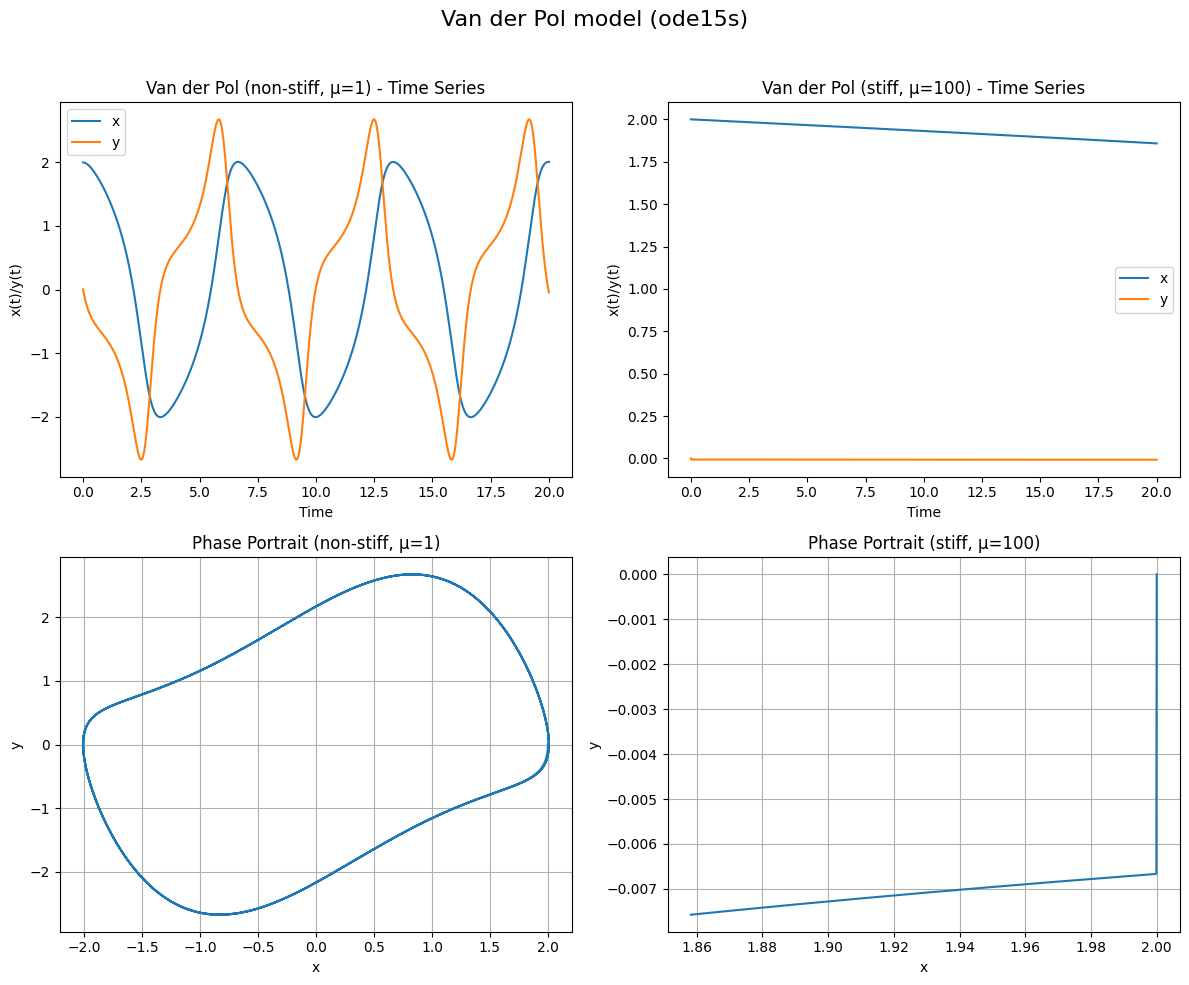

In [7]:
# Plotting time series and phase portraits
plt.figure(figsize=(12, 10))
plt.suptitle('Van der Pol model (ode15s)', fontsize=16)

# Plot time series for non-stiff
plt.subplot(2, 2, 1)
plt.plot(sol_nonstiff.t, sol_nonstiff.y[0], label='x')
plt.plot(sol_nonstiff.t, sol_nonstiff.y[1], label='y')
plt.legend()
plt.title('Van der Pol (non-stiff, μ=1) - Time Series')
plt.xlabel('Time')
plt.ylabel('x(t)/y(t)')

# Plot time series for stiff
plt.subplot(2, 2, 2)
plt.plot(sol_stiff.t, sol_stiff.y[0], label='x')
plt.plot(sol_stiff.t, sol_stiff.y[1], label='y')
plt.legend()
plt.title('Van der Pol (stiff, μ=100) - Time Series')
plt.xlabel('Time')
plt.ylabel('x(t)/y(t)')

# Phase portrait for non-stiff
plt.subplot(2, 2, 3)
plt.plot(sol_nonstiff.y[0], sol_nonstiff.y[1], label='Phase (non-stiff, μ=1)')
plt.title('Phase Portrait (non-stiff, μ=1)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Phase portrait for stiff
plt.subplot(2, 2, 4)
plt.plot(sol_stiff.y[0], sol_stiff.y[1], label='Phase (stiff, μ=100)')
plt.title('Phase Portrait (stiff, μ=100)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Comparison of implicit and explicit solver

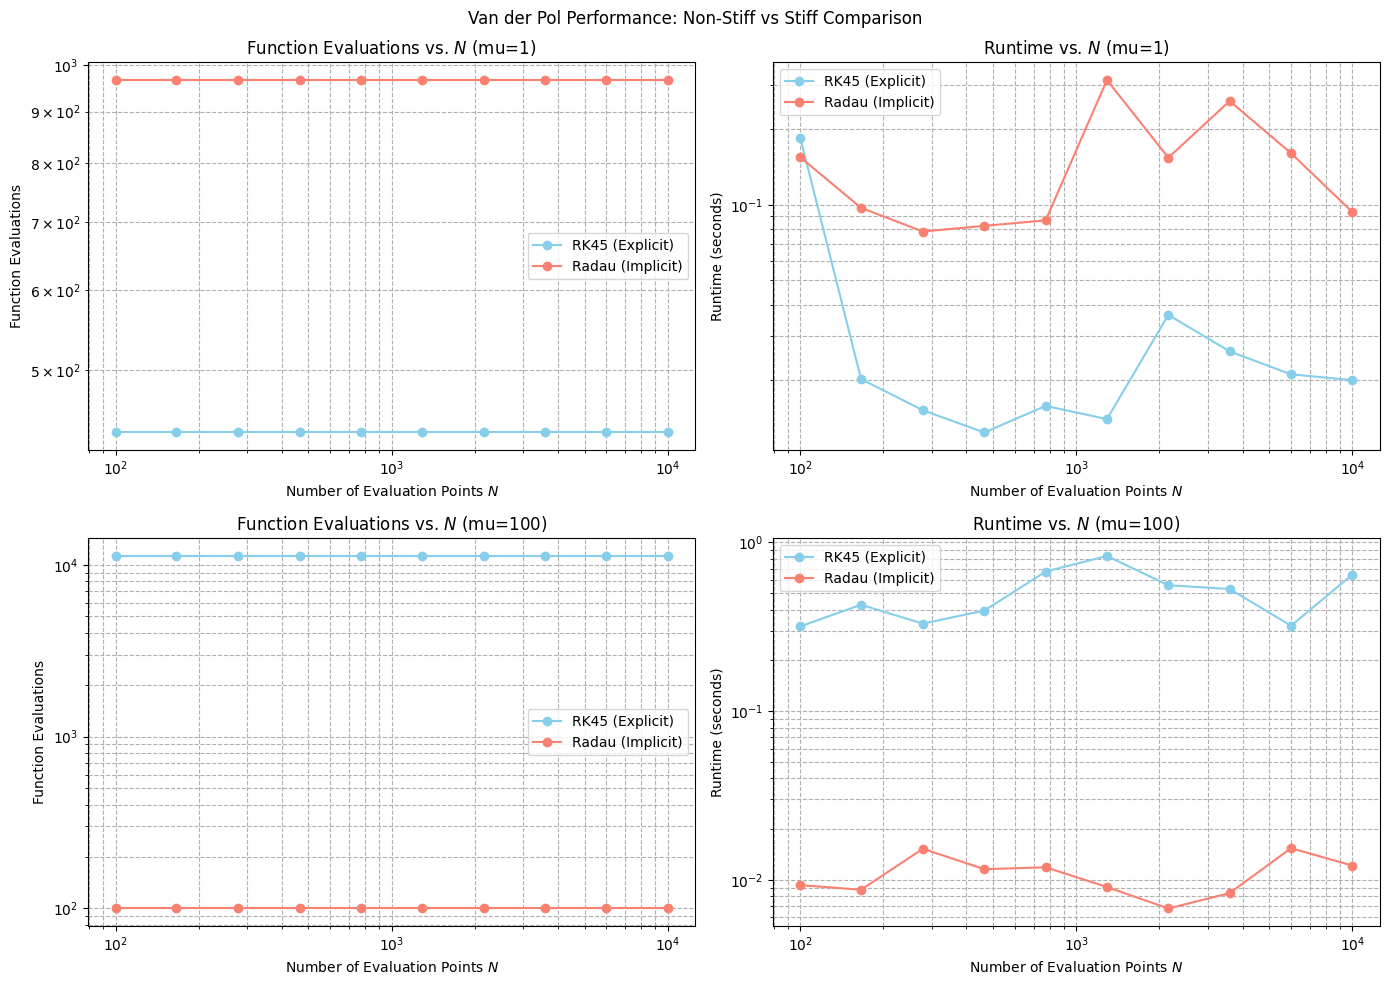

In [8]:
 import time

# Parameters
t_span = (0, 20)
x0 = [2, 0]

# Function to solve and record performance
def solve_and_record(method, mu, N):
    t_eval = np.linspace(t_span[0], t_span[1], N)
    f, Jac = van_der_pol_model(mu)
    start_time = time.time()
    sol = solve_ivp(f, t_span, x0, method=method, t_eval=t_eval)
    end_time = time.time()
    runtime = end_time - start_time
    nfev = sol.nfev
    return runtime, nfev

# Range of N values to test
N_values = np.logspace(2, 4, 10, dtype=int)  # From 1e2 to 1e4 points

# Mu values to test
mu_values = [1, 100]

# Data storage
results = {}

for mu in mu_values:
    times_rk45 = []
    nfev_rk45 = []
    times_radau = []
    nfev_radau = []
    
    for N in N_values:
        time_rk, nfev_rk = solve_and_record('RK45', mu, N)
        time_rad, nfev_rad = solve_and_record('Radau', mu, N)
        
        times_rk45.append(time_rk)
        nfev_rk45.append(nfev_rk)
        times_radau.append(time_rad)
        nfev_radau.append(nfev_rad)
    
    results[mu] = {
        'times_rk45': times_rk45,
        'nfev_rk45': nfev_rk45,
        'times_radau': times_radau,
        'nfev_radau': nfev_radau,
    }

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

for idx, mu in enumerate(mu_values):
    axs[idx, 0].plot(N_values, results[mu]['nfev_rk45'], 'o-', label='RK45 (Explicit)', color='skyblue')
    axs[idx, 0].plot(N_values, results[mu]['nfev_radau'], 'o-', label='Radau (Implicit)', color='salmon')
    axs[idx, 0].set_xscale('log')
    axs[idx, 0].set_yscale('log')
    axs[idx, 0].set_xlabel('Number of Evaluation Points $N$')
    axs[idx, 0].set_ylabel('Function Evaluations')
    axs[idx, 0].set_title(f'Function Evaluations vs. $N$ (mu={mu})')
    axs[idx, 0].legend()
    axs[idx, 0].grid(True, which="both", ls="--")

    axs[idx, 1].plot(N_values, results[mu]['times_rk45'], 'o-', label='RK45 (Explicit)', color='skyblue')
    axs[idx, 1].plot(N_values, results[mu]['times_radau'], 'o-', label='Radau (Implicit)', color='salmon')
    axs[idx, 1].set_xscale('log')
    axs[idx, 1].set_yscale('log')
    axs[idx, 1].set_xlabel('Number of Evaluation Points $N$')
    axs[idx, 1].set_ylabel('Runtime (seconds)')
    axs[idx, 1].set_title(f'Runtime vs. $N$ (mu={mu})')
    axs[idx, 1].legend()
    axs[idx, 1].grid(True, which="both", ls="--")

plt.suptitle("Van der Pol Performance: Non-Stiff vs Stiff Comparison")
plt.tight_layout()
plt.show()

## CSTR (3 state model)

In [9]:
#Parameters
params = [0.5,0.3,0.1,1.0,10.0]
t_span = (0, 20)
x0 = [1.0, 0.5, 0.2]  # Initial conditions for CSTR model

f, _ = CSTR_3state_model(params)

# Solve using odeint
sol = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 1000))

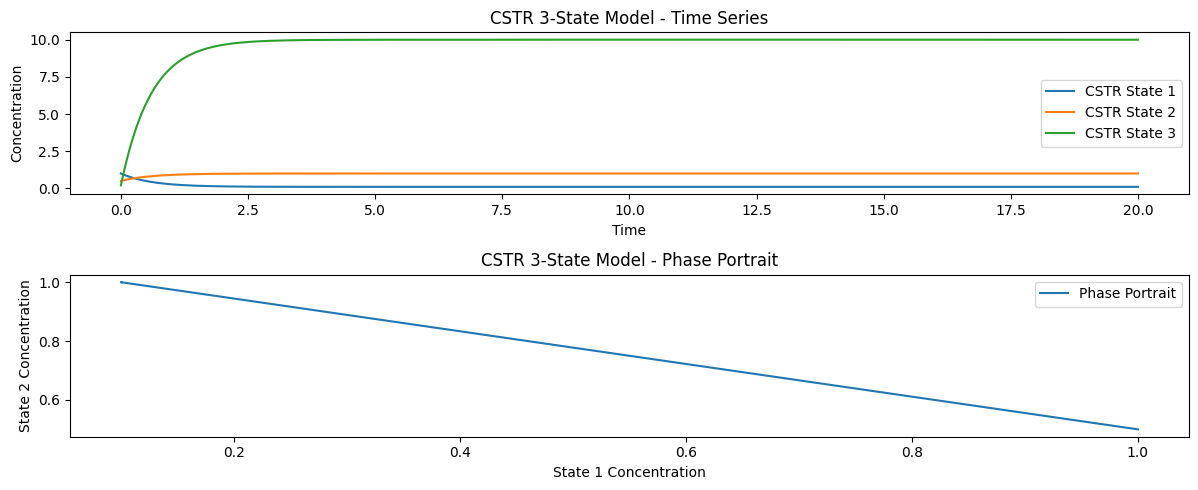

In [10]:
#Plot
plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], label='CSTR State 1')
plt.plot(sol.t, sol.y[1], label='CSTR State 2')
plt.plot(sol.t, sol.y[2], label='CSTR State 3')
plt.title('CSTR 3-State Model - Time Series')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(sol.y[0], sol.y[1], label='Phase Portrait')
plt.title('CSTR 3-State Model - Phase Portrait')
plt.xlabel('State 1 Concentration') 
plt.ylabel('State 2 Concentration')
plt.legend()
plt.tight_layout()
plt.show()

## CSTR (1 state model)

In [11]:
#Parameters
params = [0.5,0.3,0.1,1.0,10.0]
t_span = (0, 20)
x0 = [1.0]  # Initial conditions for CSTR model

f, _ = CSTR_1state_model(params)

# Solve using odeint
sol = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], 1000))

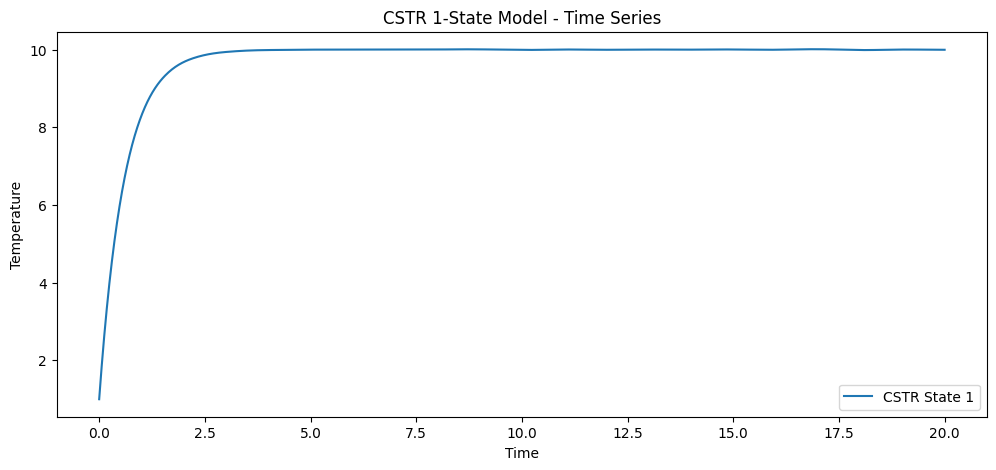

In [12]:
#Plot
plt.figure(figsize=(12, 5))
plt.plot(sol.t, sol.y[0], label='CSTR State 1')
plt.title('CSTR 1-State Model - Time Series')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

## PFR 3 state

In [24]:
import numpy as np

def PFR_3state_model(params, esdirk=False):
    """
    Creates PFR model functions with standard ODE interface (t, x) only.
    
    Parameters:
    -----------
    params : dict
        Dictionary containing all model parameters:
            - dz : float     (spatial step)
            - v : float      (velocity)
            - D : list       (diffusivity in shape [DA, DB, DT])
            - beta : float   (heat of reaction)
            - k : function   (reaction rate constant)
            - u : list       (inlet conditions [CAin, CBin, Tin])
            - Ea_R : float   (Activation energy divided by gas constant)
    
    esdirk : bool
        Flag for ESDIRK-specific returns
    
    Returns:
    --------
    f, jacobian : functions
        ODE functions compatible with standard solvers
    """
    # Unpack parameters
    dz = params["dz"]
    v = params["v"]
    DA, DB, DT = params["D"]
    beta = params["beta"]
    k = params["k"]
    CAin, CBin, Tin = params["u"]
    Ea_R = params["Ea_R"]
    
    def f(t, x):
        """ODE function for PFR system"""
        n = len(x) // 3
        CA = x[:n]
        CB = x[n:2*n]
        T = x[2*n:]
        
        # Initialize derivatives
        dCA_dt = np.zeros(n)
        dCB_dt = np.zeros(n)
        dT_dt = np.zeros(n)
        
        # Reaction term
        r = k(T) * CA * CB

        ### Convection and diffusion terms for CA
        # Convection term
        NconvA = np.zeros(n+1)
        NconvA[0] = v * CAin        # Inlet Boundary (Dirichlet)
        NconvA[1:n+1] = v * CA[0:n]

        # Diffusion term
        JA = np.zeros(n+1)
        JA[1:n] = (-DA / dz) * (CA[1:n] - CA[0:n-1])
        JA[0] = 0                   # Inlet Boundary (Dirichlet)
        JA[-1] = 0                  # Outlet Boundary (Neumann)

        # Flux = Convection + Diffusion
        NA = NconvA + JA
        # Reaction term
        rA = -r
        # Differential Equation for CA
        dCA_dt = (NA[1:n+1] - NA[0:n]) / (-dz) + rA

        ### Convection and diffusion terms for CB
        # Convection term
        NconvB = np.zeros(n+1)
        NconvB[1:n+1] = v * CB[0:n]
        NconvB[0] = v * CBin        # Inlet Boundary (Dirichlet)

        # Diffusion term
        JB = np.zeros(n+1)
        JB[1:n] = (-DB / dz) * (CB[1:n] - CB[0:n-1])
        JB[0] = 0                   # Inlet Boundary (Dirichlet)
        JB[-1] = 0                  # Outlet Boundary (Neumann)

        # Flux = Convection + Diffusion
        NB = NconvB + JB
        # Reaction term
        rB = -2 * r
        # Differential Equation for CB
        dCB_dt = (NB[1:n+1] - NB[0:n]) / (-dz) + rB

        ### Convection and diffusion terms for T
        # Convection term
        NconvT = np.zeros(n+1)
        NconvT[1:n+1] = v * T[0:n]
        NconvT[0] = v * Tin         # Inlet Boundary (Dirichlet)

        # Diffusion term
        JT = np.zeros(n+1)
        JT[1:n] = (-DT / dz) * (T[1:n] - T[0:n-1])
        JT[0] = 0                   # Inlet Boundary (Dirichlet)
        JT[-1] = 0                  # Outlet Boundary (Neumann)
        # Flux = Convection + Diffusion
        NT = NconvT + JT
        # Reaction term
        rT = beta * r
        # Differential Equation for T
        dT_dt = (NT[1:n+1] - NT[0:n]) / (-dz) + rT

        # Combine derivatives
        xdot = np.concatenate([dCA_dt, dCB_dt, dT_dt])
        
        if esdirk:
            return xdot, x
        return xdot

    def jacobian(t, x):
        """Jacobian function for PFR system"""
        n = len(x) // 3
        CA = x[:n]
        CB = x[n:2*n]
        T = x[2*n:]
        
        # Initialize block-diagonal Jacobian structure
        J = np.zeros((3*n, 3*n))
        
        # Reaction rate and its derivatives
        r = k(T) * CA * CB
        dr_dCA = k(T) * CB
        dr_dCB = k(T) * CA
        dr_dT = k(T) * CA * CB * (Ea_R / T**2)
        
        # Fill Jacobian blocks
        for i in range(n):
            # CA equation
            J[i, i] = -v/dz - DA/dz**2 - dr_dCA[i]
            if i > 0:
                J[i, i-1] = DA/dz**2
            J[i, n+i] = -dr_dCB[i]
            J[i, 2*n+i] = -dr_dT[i]
            
            # CB equation
            J[n+i, i] = -2*dr_dCA[i]
            J[n+i, n+i] = -v/dz - DB/dz**2 - 2*dr_dCB[i]
            if i > 0:
                J[n+i, n+i-1] = DB/dz**2
            J[n+i, 2*n+i] = -2*dr_dT[i]
            
            # T equation
            J[2*n+i, i] = beta*dr_dCA[i]
            J[2*n+i, n+i] = beta*dr_dCB[i]
            J[2*n+i, 2*n+i] = -v/dz - DT/dz**2 + beta*dr_dT[i]
            if i > 0:
                J[2*n+i, 2*n+i-1] = DT/dz**2
        
        if esdirk:
            return J, np.eye(3*n)
        return J
    
    return f, jacobian

In [49]:
# Define parameters
params = {
    "dz": 0.1,
    "v": 1.0,
    "D": [0.1, 0.1, 0.2],
    "beta": 0.1,
    "k": lambda T: 1.0 * np.exp(-5000/T),
    "u": [1.0, 1.0, 300.0],  # [CAin, CBin, Tin]
    "Ea_R": 5000.0
}

# Create model functions
f, J = PFR_3state_model(params)

# Initial condition
n = 50  # number of spatial points
x0 = np.concatenate([
    np.zeros(n),    # CA initial
    np.zeros(n),    # CB initial
    300*np.ones(n)  # T initial
])

t_span = (0, 10)
N = 1000

# Solve using odeint
sol = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))

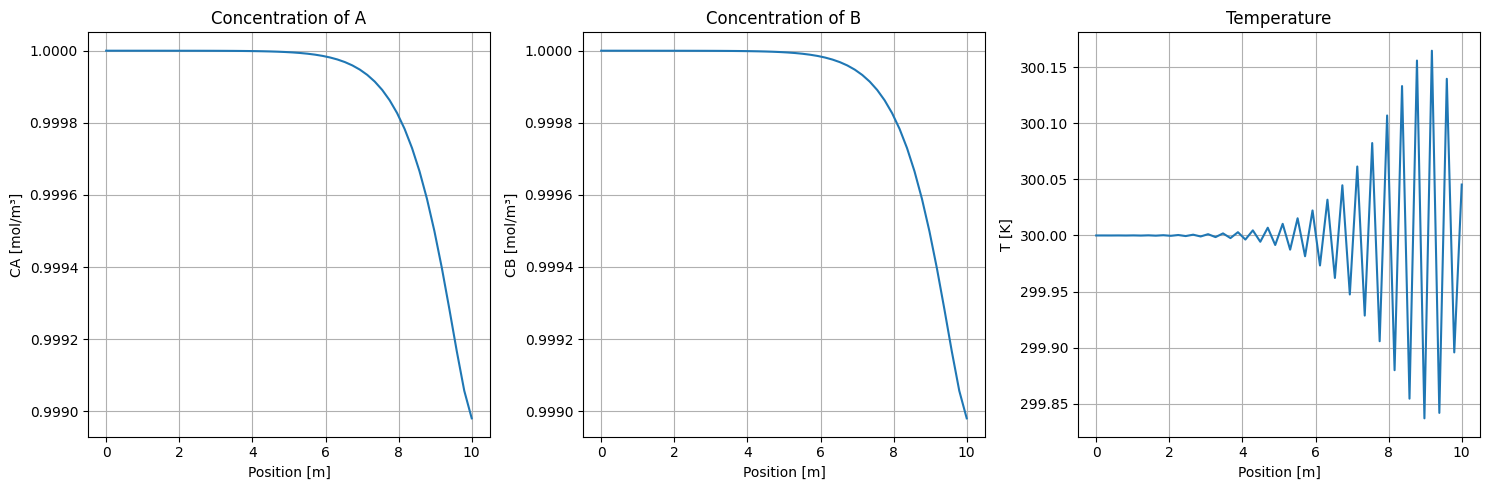

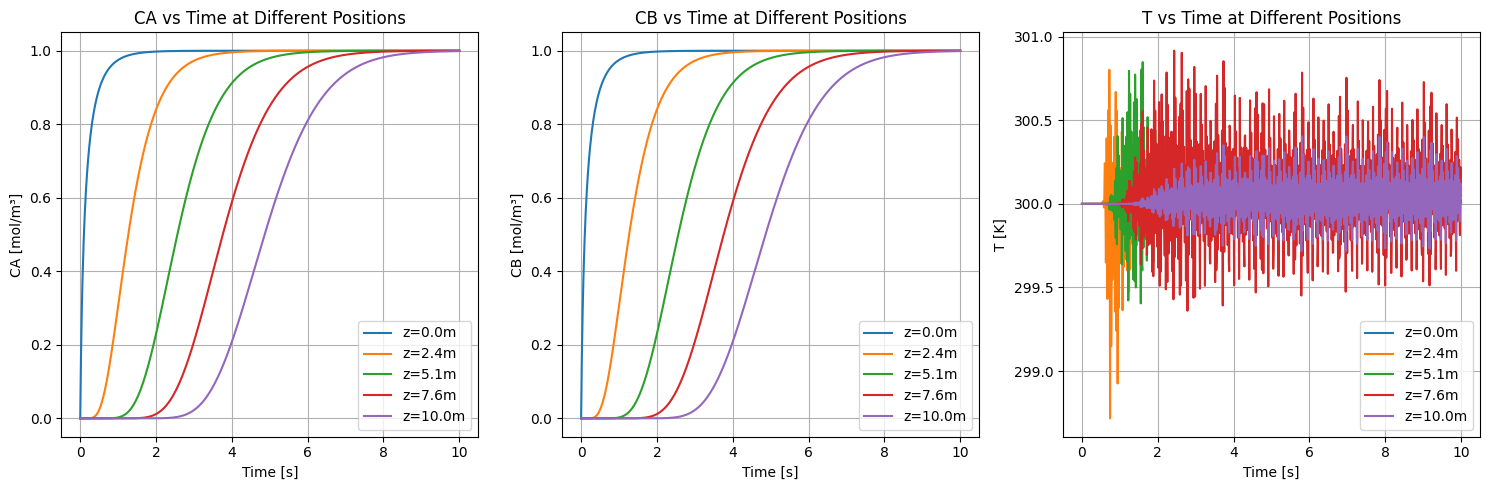

In [50]:
# Extract results
t_sol = sol.t
x_sol = sol.y
n_points = len(CA_initial)

# Plot results at final time
z = np.linspace(0, L, n_points)
CA_final = x_sol[:n_points, -1]
CB_final = x_sol[n_points:2*n_points, -1]
T_final = x_sol[2*n_points:, -1]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(z, CA_final)
plt.title('Concentration of A')
plt.xlabel('Position [m]')
plt.ylabel('CA [mol/m³]')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(z, CB_final)
plt.title('Concentration of B')
plt.xlabel('Position [m]')
plt.ylabel('CB [mol/m³]')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(z, T_final)
plt.title('Temperature')
plt.xlabel('Position [m]')
plt.ylabel('T [K]')
plt.grid()

plt.tight_layout()
plt.show()

# Plot time evolution at selected positions
selected_positions = [0, n//4, n//2, 3*n//4, n-1]
position_labels = [f'z={z[pos]:.1f}m' for pos in selected_positions]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
for pos in selected_positions:
    plt.plot(t_sol, x_sol[pos, :], label=position_labels[selected_positions.index(pos)])
plt.title('CA vs Time at Different Positions')
plt.xlabel('Time [s]')
plt.ylabel('CA [mol/m³]')
plt.legend()
plt.grid()

plt.subplot(1, 3, 2)
for pos in selected_positions:
    plt.plot(t_sol, x_sol[n_points + pos, :], label=position_labels[selected_positions.index(pos)])
plt.title('CB vs Time at Different Positions')
plt.xlabel('Time [s]')
plt.ylabel('CB [mol/m³]')
plt.legend()
plt.grid()

plt.subplot(1, 3, 3)
for pos in selected_positions:
    plt.plot(t_sol, x_sol[2*n_points + pos, :], label=position_labels[selected_positions.index(pos)])
plt.title('T vs Time at Different Positions')
plt.xlabel('Time [s]')
plt.ylabel('T [K]')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

## PFR 1 state

In [29]:
import numpy as np

def PFR_1state_model(params, esdirk=False):
    """
    Creates PFR model functions with standard ODE interface (t, x) only for 1-state (T) system.
    
    Parameters:
    -----------
    params : dict
        Dictionary containing all model parameters:
            - dz : float     (spatial step)
            - v : float      (velocity)
            - D : float      (diffusivity DT)
            - beta : float   (heat of reaction)
            - k : function   (reaction rate constant)
            - u : list       (inlet conditions [CAin, CBin, Tin])
            - Ea_R : float   (Activation energy divided by gas constant)
    
    esdirk : bool
        Flag for ESDIRK-specific returns
    
    Returns:
    --------
    f, jacobian : functions
        ODE functions compatible with standard solvers
    """
    # Unpack parameters
    dz = params["dz"]
    v = params["v"]
    DT = params["D"]
    beta = params["beta"]
    k = params["k"]
    CAin, CBin, Tin = params["u"]
    Ea_R = params["Ea_R"]
    
    def f(t, x):
        """ODE function for 1-state PFR system"""
        n = len(x)
        dT_dt = np.zeros(n)
        
        # Calculate CA and CB from temperature (assuming equilibrium)
        CA = CAin + (1 / beta) * (Tin - x)
        CB = CBin + (2 / beta) * (Tin - x)
        
        # Reaction term
        r = k(x) * CA * CB
        
        # Convection term
        NconvT = np.zeros(n+1)
        NconvT[0] = v * Tin         # Inlet Boundary (Dirichlet)
        NconvT[1:n+1] = v * x[0:n]
        
        # Diffusion term
        JT = np.zeros(n+1)
        JT[1:n] = (-DT / dz) * (x[1:n] - x[0:n-1])
        JT[0] = 0                   # Inlet Boundary (Dirichlet)
        JT[-1] = 0                  # Outlet Boundary (Neumann)
        
        # Total flux and reaction term
        NT = NconvT + JT
        rT = beta * r
        
        # Differential Equation for T
        dT_dt = (NT[1:n+1] - NT[0:n]) / (-dz) + rT
        
        if esdirk:
            return dT_dt, x
        return dT_dt

    def jacobian(t, x):
        """Jacobian function for 1-state PFR system"""
        n = len(x)
        
        # Calculate CA and CB from temperature
        CA = CAin + (1 / beta) * (Tin - x)
        CB = CBin + (2 / beta) * (Tin - x)
        
        # Initialize Jacobian matrix
        J = np.zeros((n, n))
        
        # Main diagonal terms (including reaction derivatives)
        main_diag = (-v/dz - DT/dz**2) + beta * k(x) * (
            (Ea_R/x**2)*CA*CB - (1/beta)*CB - (2/beta)*CA
        )
        
        # Lower diagonal (diffusion terms)
        lower_diag = DT/dz**2
        
        # Upper diagonal (would be convection terms, but upwind scheme makes them zero)
        
        # Fill the Jacobian matrix
        for i in range(n):
            J[i, i] = main_diag[i]
            if i > 0:
                J[i, i-1] = lower_diag
        
        if esdirk:
            return J, np.eye(n)
        return J
    
    return f, jacobian

In [43]:
# Define parameters
params = {
    "dz": 0.1,
    "v": 1.0,
    "D": 0.2,          # Only DT needed for 1-state model
    "beta": 0.1,
    "k": lambda T: 1.0 * np.exp(-5000/T),
    "u": [1.0, 1.0, 300.0],  # [CAin, CBin, Tin]
    "Ea_R": 5000.0
}

# Create model functions
f, J = PFR_1state_model(params)

# Initial condition
n = 50  # number of spatial points
x0 = 300 * np.ones(n)  # T initial

t_span = (0, 10)
N = 1000

# Solve with scipy.integrate.solve_ivp
from scipy.integrate import solve_ivp

# Solve using odeint
sol = solve_ivp(f, t_span, x0, method='RK45', t_eval=np.linspace(t_span[0], t_span[1], N))

/var/folders/v_/bb7dt9w12158g8xjfpl9dzfc0000gn/T/ipykernel_1848/1127635740.py:46: RuntimeWarning: overflow encountered in multiply
  r = k(x) * CA * CB


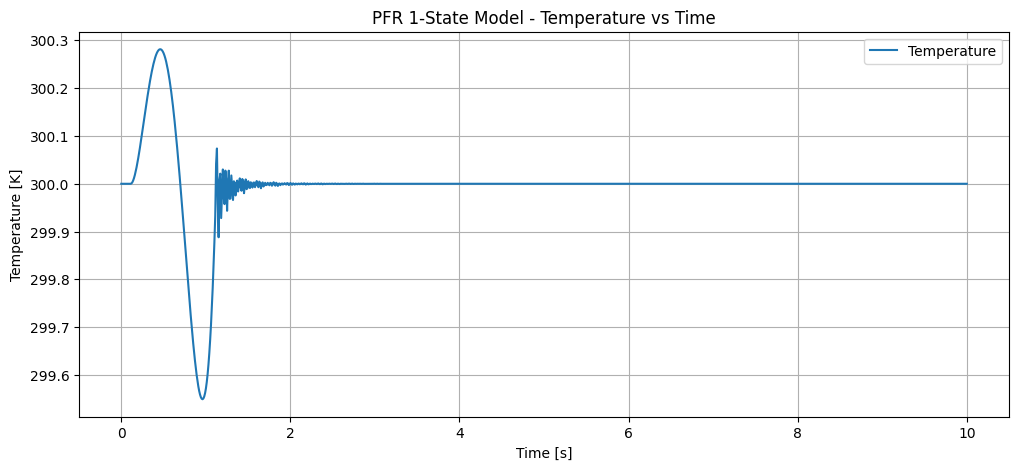

In [44]:
#Plot the results
plt.figure(figsize=(12, 5))
plt.plot(sol.t, sol.y[0], label='Temperature')
plt.title('PFR 1-State Model - Temperature vs Time')
plt.xlabel('Time [s]')
plt.ylabel('Temperature [K]')
plt.legend()
plt.grid()
plt.show()